<a href="https://colab.research.google.com/github/IaaC/MACT21.22_Digital_tools_Big_Data_part_3/blob/main/session_2/Lidar_MaCT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Digital tools for Analysing Lidar Data

![IAAC](https://pbs.twimg.com/profile_images/1105059874826792961/r3HHyWWm_400x400.png)
# Digital Tools and Big Data
## [Master in City & Technology - MaCT](https://iaac.net/educational-programmes/masters-programmes/master-in-city-technology/) 
This is a collab notebook to replicate an excercise of analysing Lidar data. The original post is available [here](https://towardsdatascience.com/3d-point-cloud-clustering-tutorial-with-k-means-and-python-c870089f3af8) published by "Towards Data Science" and written by Florent Poux

Edited by: Diego Pajarito

# Import Basic Libraries and paths

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

To easily manage the data structures we can set some variables

In [ ]:
data_folder = './DATA/'
dataset = 'KME_planes.xyz' /content/DATA/KME_planes.xyz

The author has enabled a [google drive folder](https://drive.google.com/drive/folders/1Ih_Zz9a6UcbUlaA-puEB_is7DYvXrb4w) to acces test data. We will use KME_planes.xyz and KME_cars.xyz files

In [ ]:
x,y,z,illuminance,reflectance,intensity,nb_of_returns = np.loadtxt(data_folder+dataset,skiprows=1, delimiter=';', unpack=True)

This third example shows how pandas features can be called through the code

# First Plots


Text(0, 0.5, 'Z-axis ')

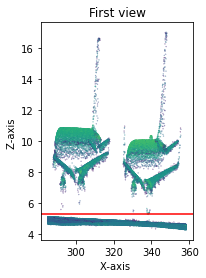

In [ ]:
plt.subplot(1, 2, 1) # row 1, col 2 index 1
plt.scatter(x, z, c=intensity, s=0.05)
plt.axhline(y=np.mean(z), color='r', linestyle='-')
plt.rcParams["figure.figsize"] = (18,14.5)
plt.title("First view")
plt.xlabel("X-axis ")
plt.ylabel("Z-axis ")

Improving plots

Text(0, 0.5, 'Z-axis ')

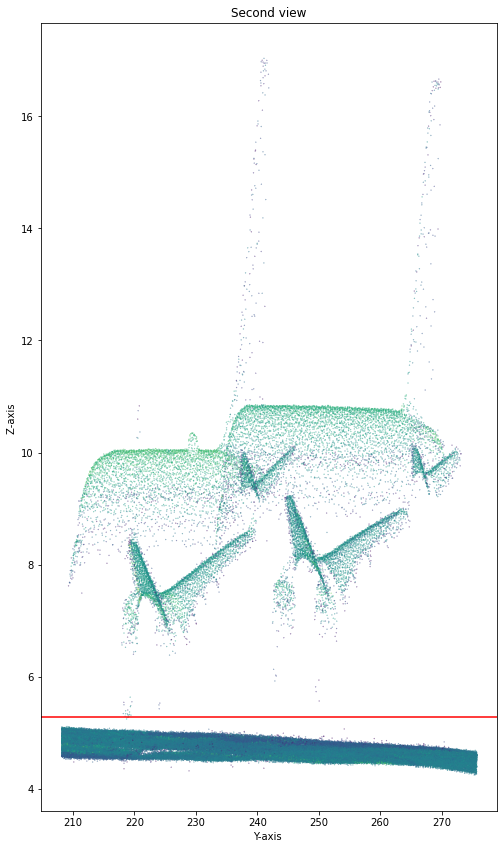

In [ ]:
plt.subplot(1, 2, 2) # index 2
plt.scatter(y, z, c=intensity, s=0.05)
plt.axhline(y=np.mean(z), color='r', linestyle='-')
plt.rcParams["figure.figsize"] = (18,14.5)
plt.title('Second view')
plt.xlabel('Y-axis ')
plt.ylabel('Z-axis ')

# Point Cloud Filtering

In this case, we can use the mean as a parameter to filter

In [ ]:
pcd=np.column_stack((x,y,z))
mask=z>np.mean(z)
spatial_query=pcd[z>np.mean(z)]

In [ ]:
pcd.shape==spatial_query.shape

print("Rows afer filtering: " + str(len(pcd)))

Rows afer filtering: 144709


## Plotting Results in 3D

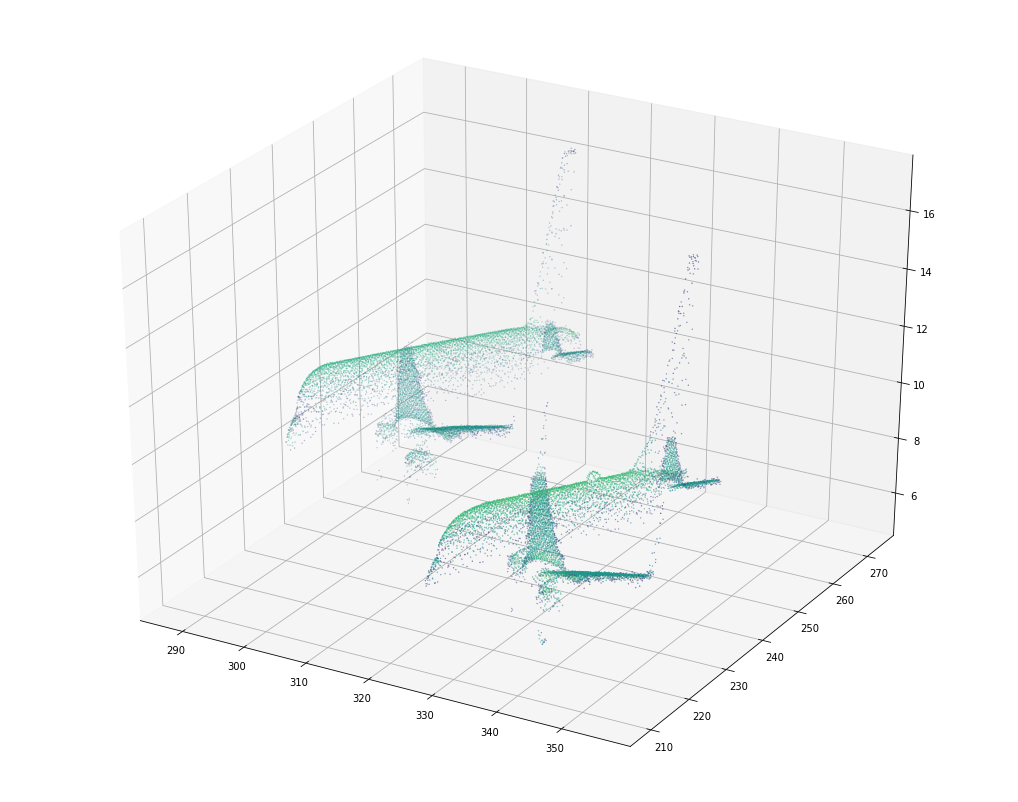

In [ ]:
ax = plt.axes(projection='3d')
ax.scatter(x[mask], y[mask], z[mask], c = intensity[mask], s=0.1)
plt.show()

## Plotting Results in 2D

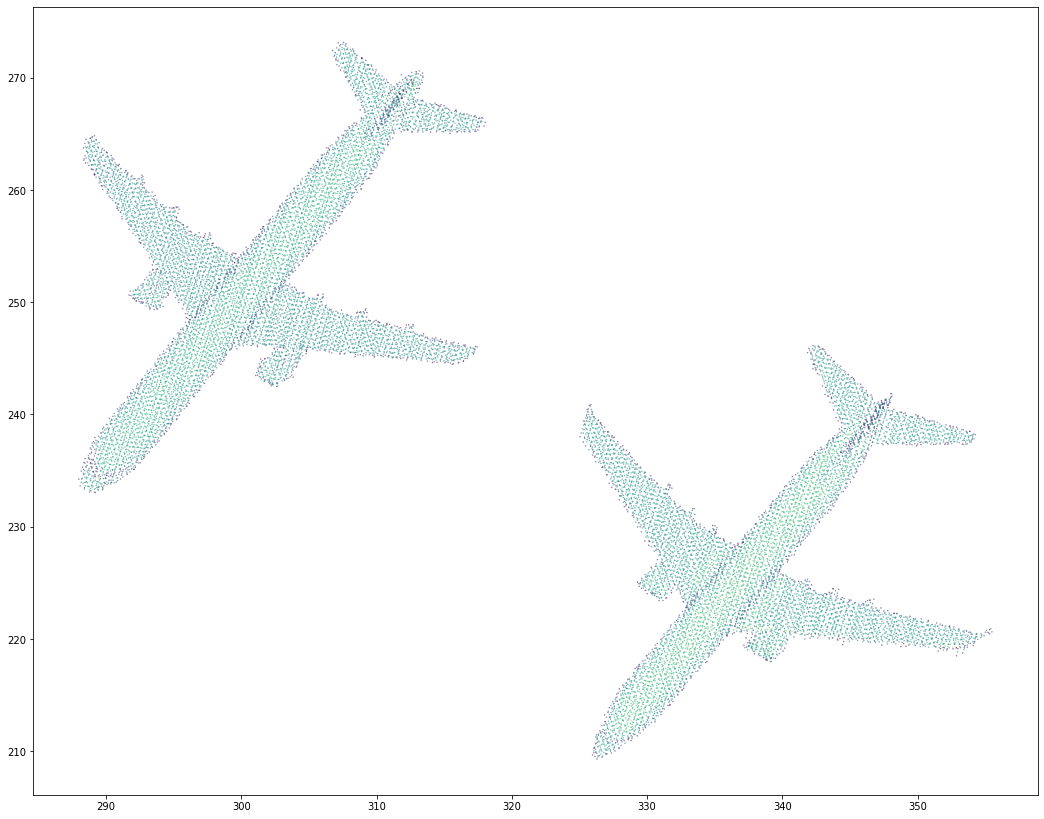

In [ ]:
plt.scatter(x[mask], y[mask], c=intensity[mask], s=0.1)
plt.show()


# K-Means Clustering Implementation

In [ ]:
X=np.column_stack((x[mask], y[mask]))

We can Initially work with two clusters based on our initial view of the results.

What happens after changing the number of clusters?

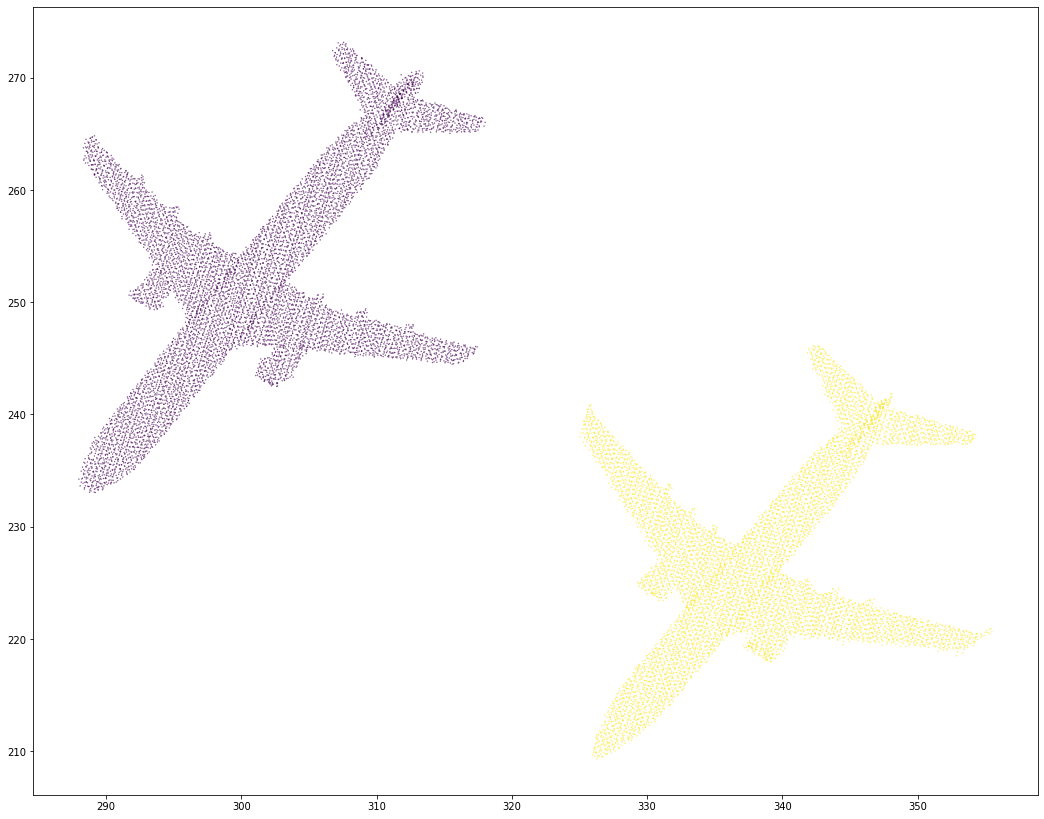

In [ ]:
kmeans = KMeans(n_clusters=2).fit(X)
plt.scatter(x[mask], y[mask], c=kmeans.labels_, s=0.1)
plt.show()

## WCSS (Within-Cluster Sum of Square)

Note from the blog:

The init argument is the method for initializing the centroid, which here we set to k-means++ for clustering with an emphasis to speed up convergence. then, the wcss value through kmeans.inertia_ represent the sum of squared distance between each point and the centroid in a cluster.

In [ ]:
X=np.column_stack((x[mask], y[mask], z[mask]))
#X=np.column_stack((x, y, z))
wcss = [] 
for i in range(1, 20):
 kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
 kmeans.fit(X)
 wcss.append(kmeans.inertia_)

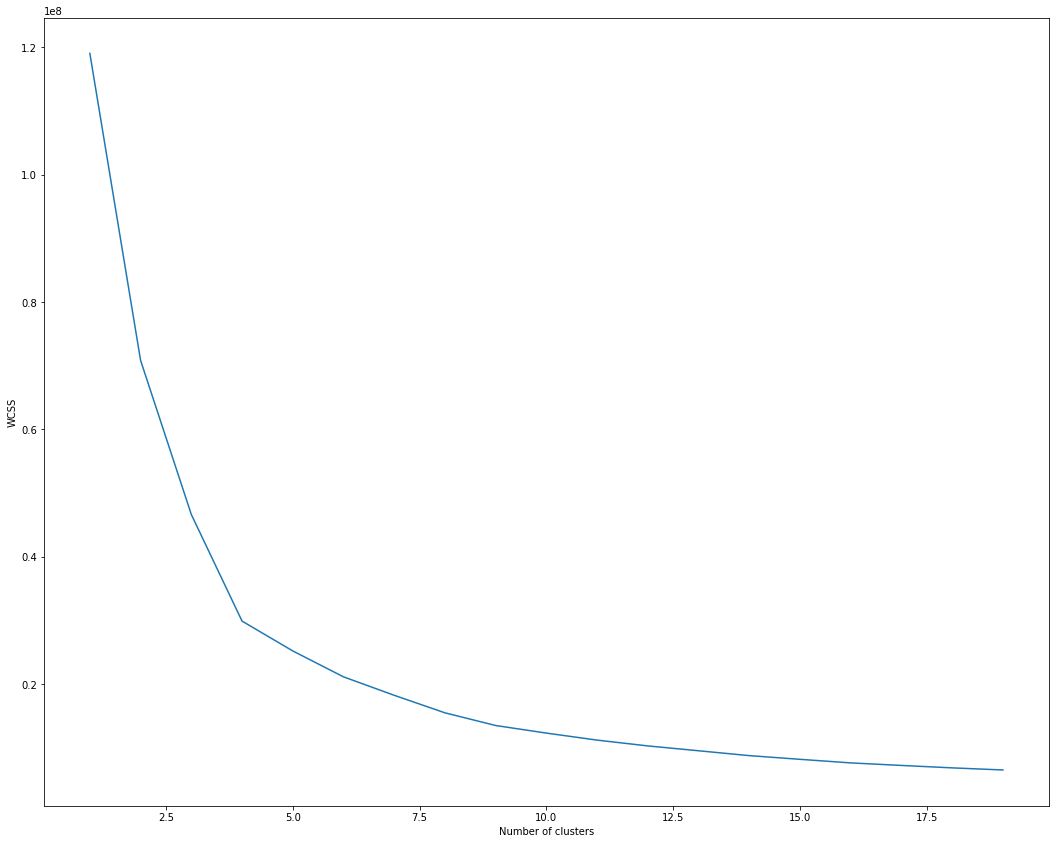

In [ ]:
plt.plot(range(1, 20), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

# Additional examples

Some colorful representation

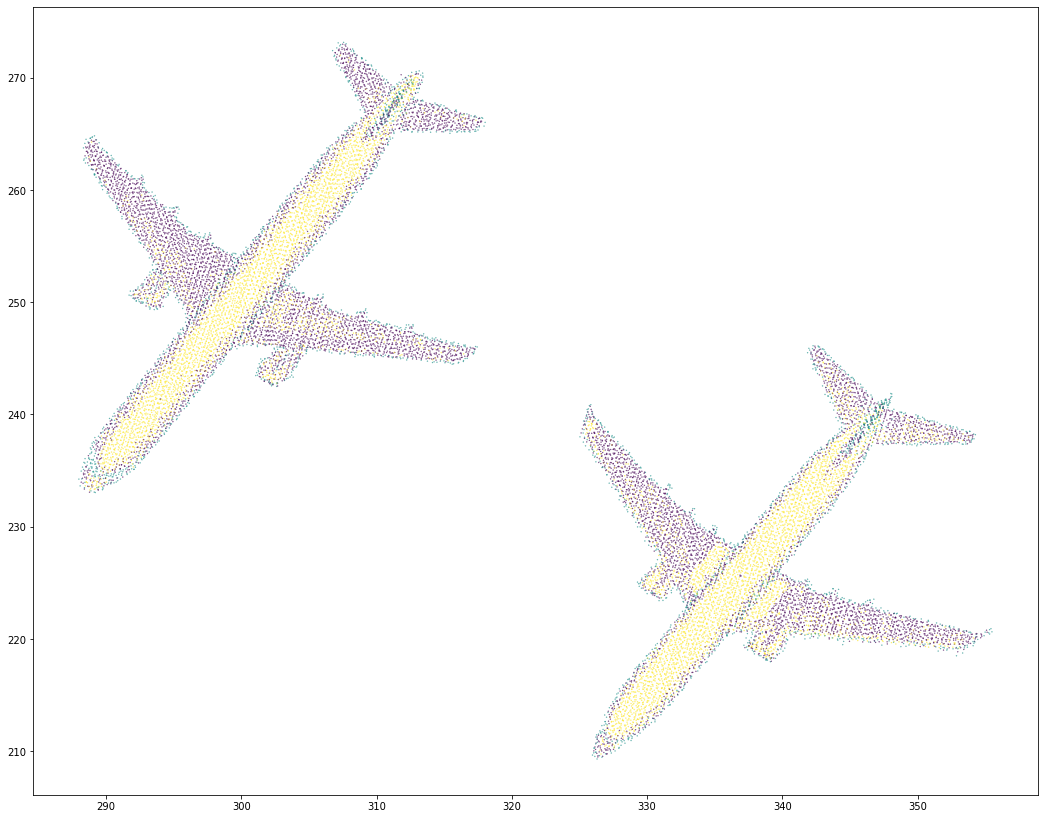

In [ ]:
X=np.column_stack((x[mask], y[mask], z[mask], illuminance[mask], nb_of_returns[mask], intensity[mask]))
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
plt.scatter(x[mask], y[mask], c=kmeans.labels_, s=0.1)
plt.show()

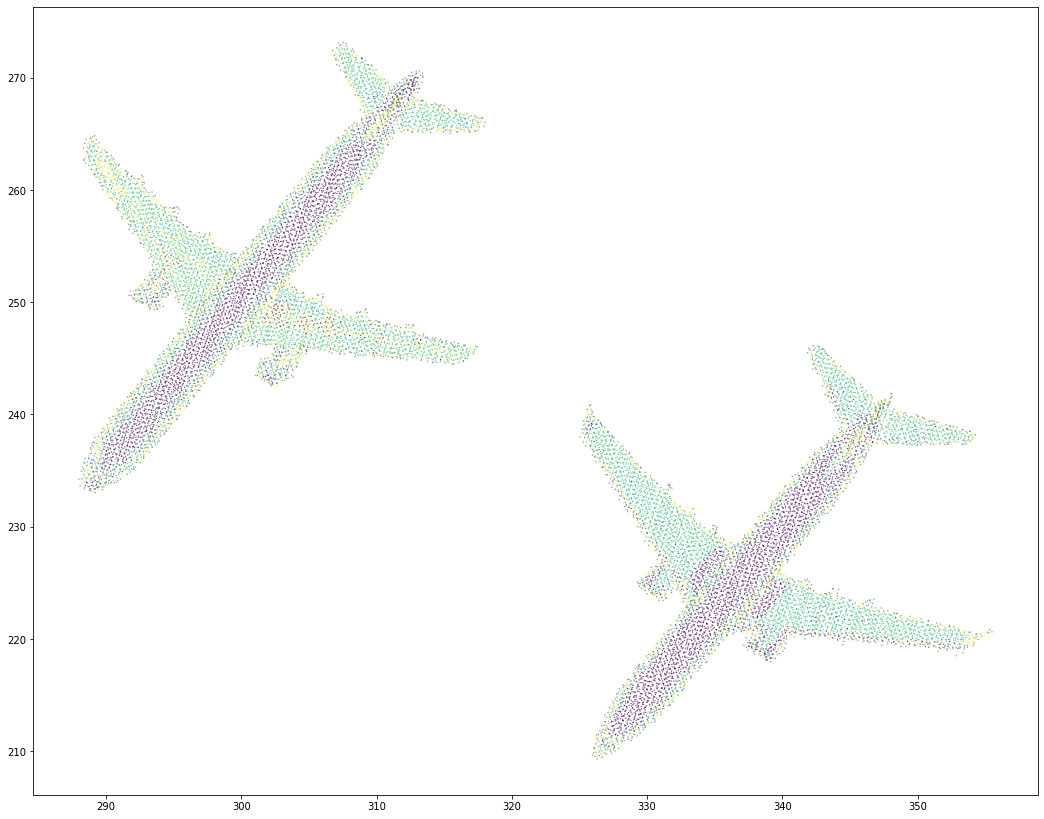

In [ ]:
X=np.column_stack((z[mask] ,z[mask], intensity[mask]))
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)
plt.scatter(x[mask], y[mask], c=kmeans.labels_, s=0.1)
plt.show()

## Note

If you are not in Google collab you can also save the results as shown below

In [ ]:
result_folder = "./DATA/RESULTS/"
np.savetxt(result_folder+dataset.split(".")[0]+"_result.xyz", np.column_stack((x[mask], y[mask], z[mask],kmeans.labels_)), fmt='%1.4f', delimiter=';')